Parsed 71 matrices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]


/var/folders/21/rybqmdj15yz5lp1lppq1761m0000gn/T/ipykernel_5922/2169083492.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


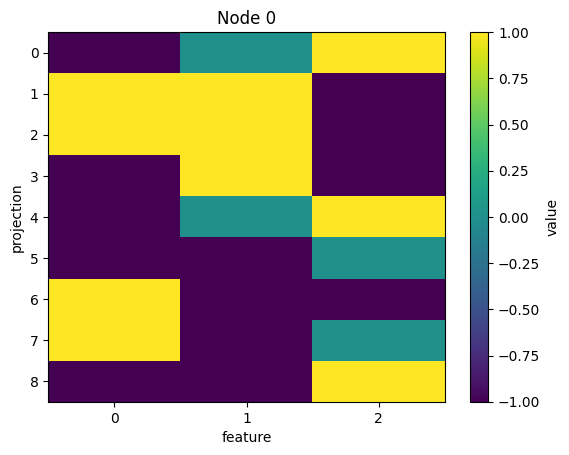

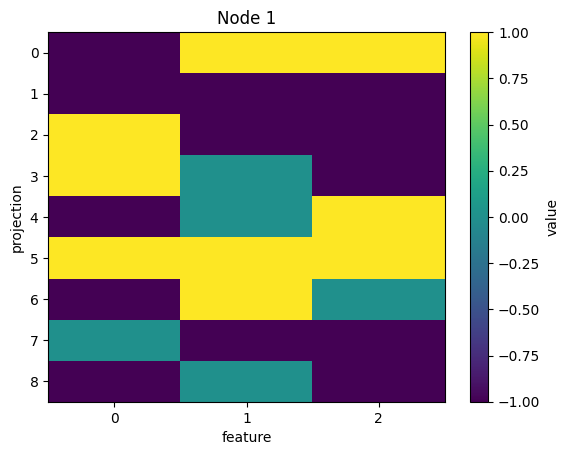

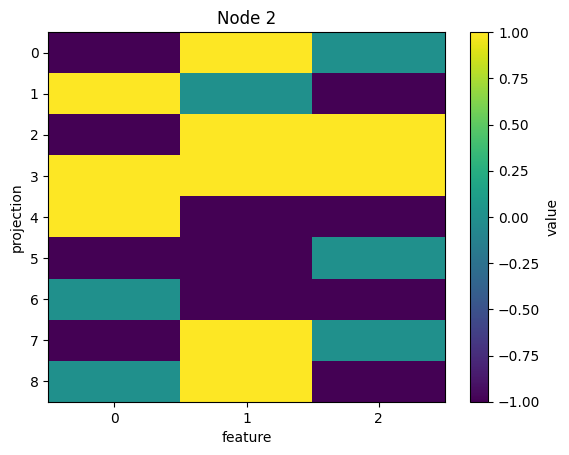

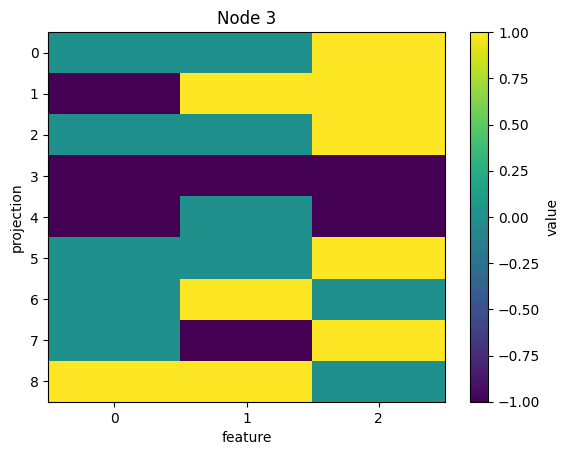

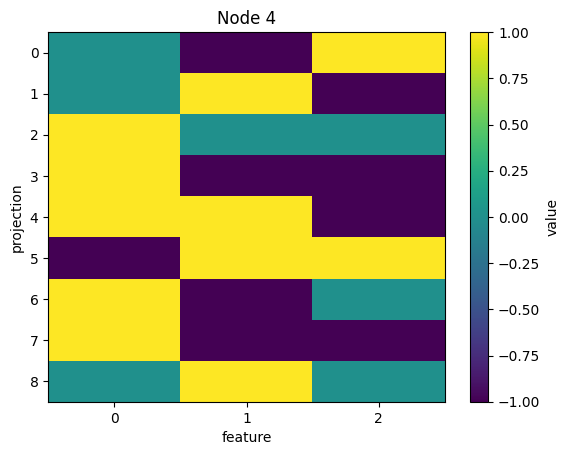

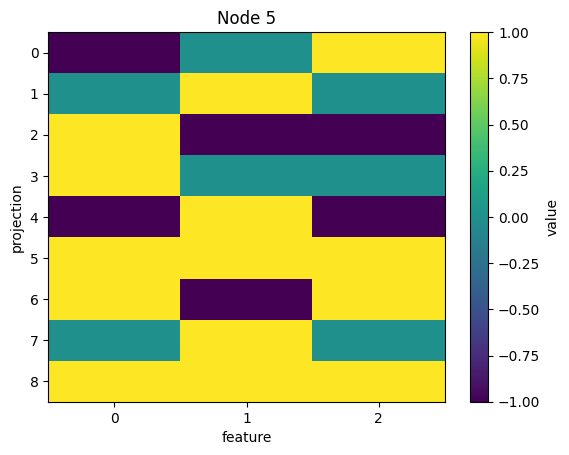

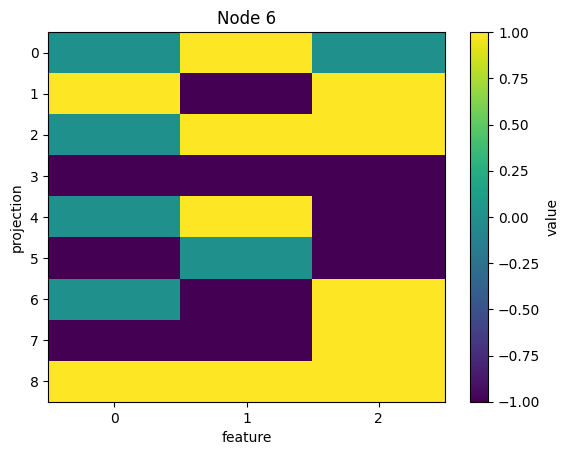

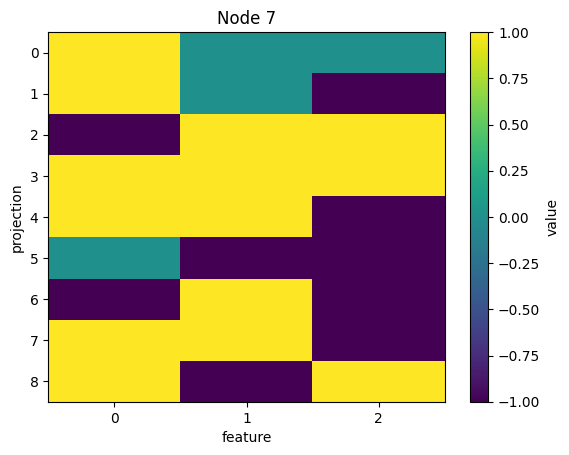

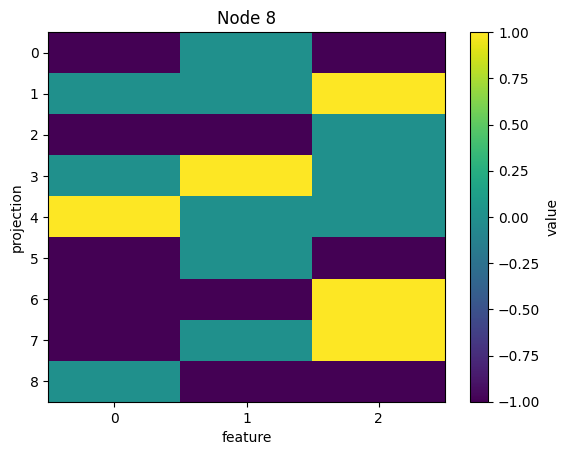

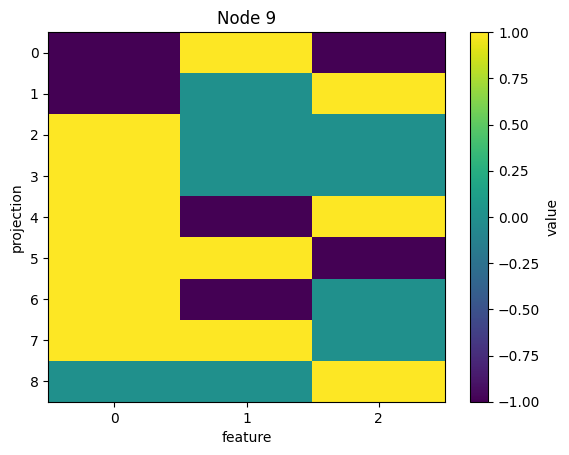

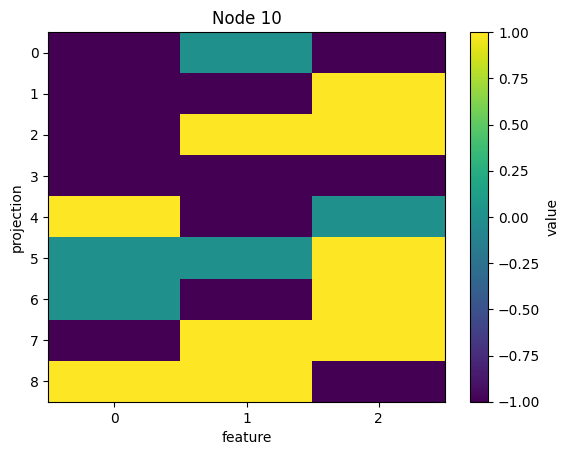

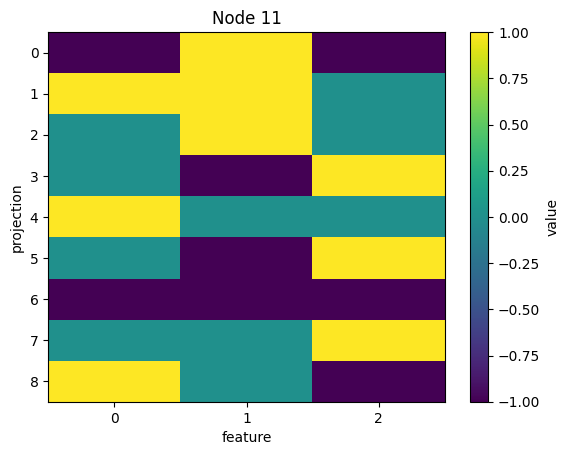

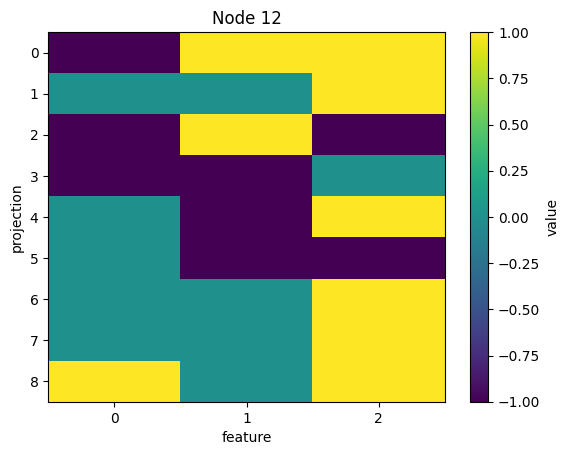

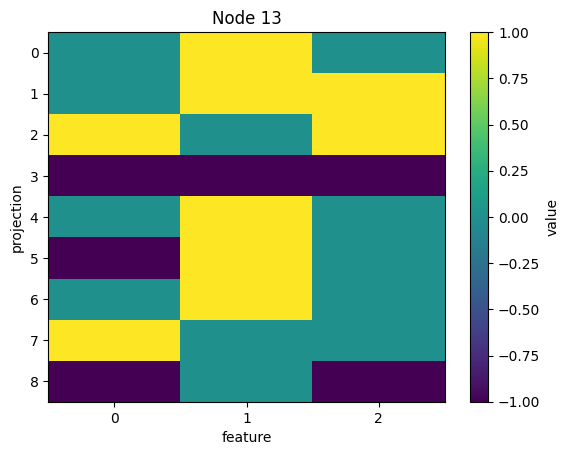

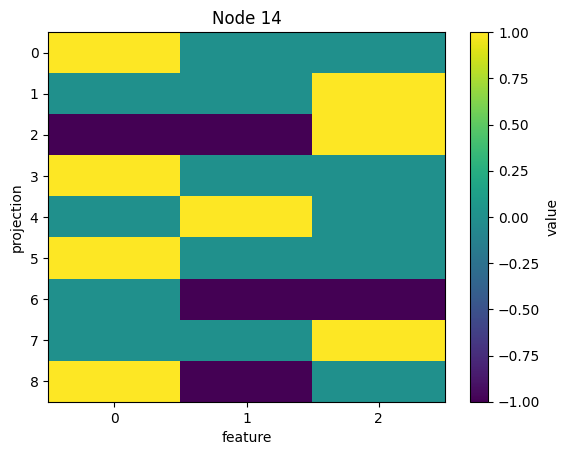

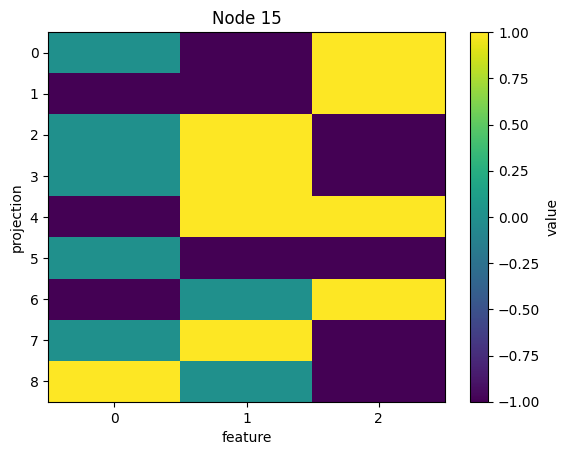

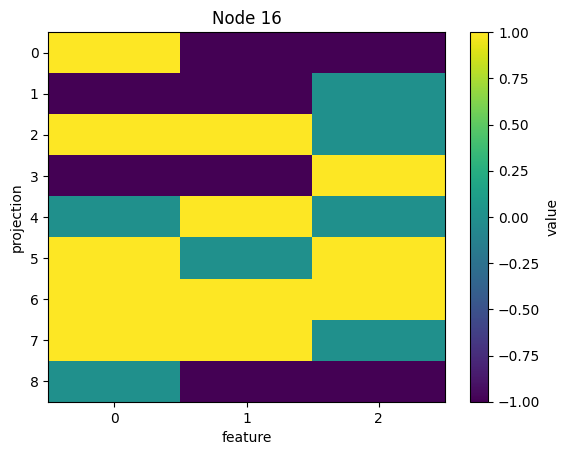

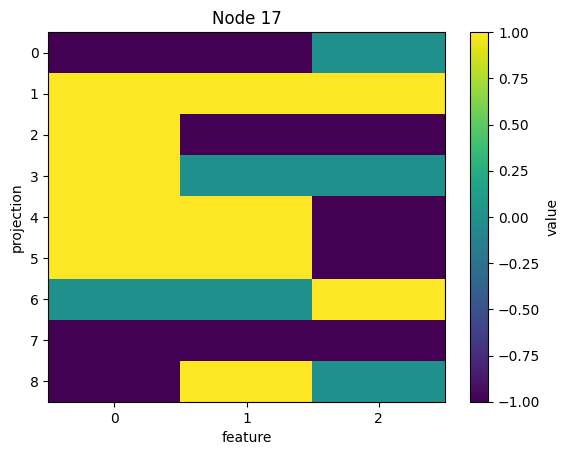

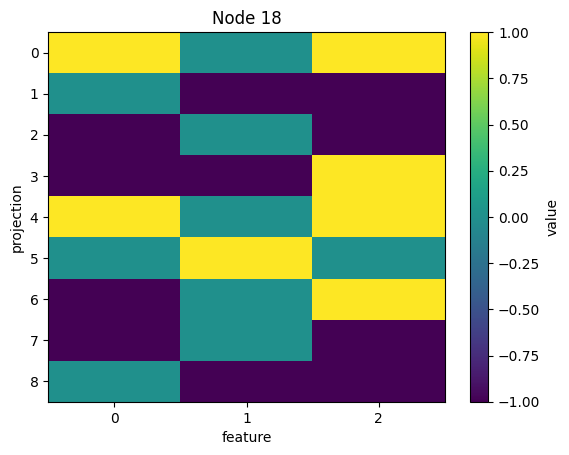

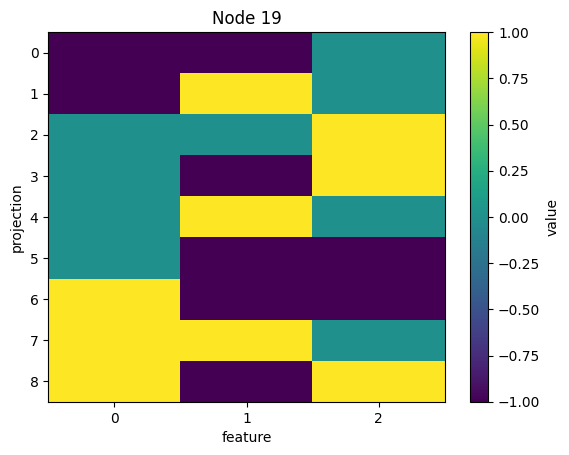

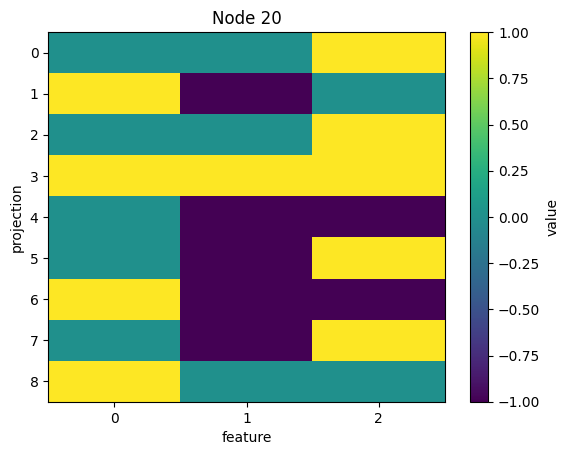

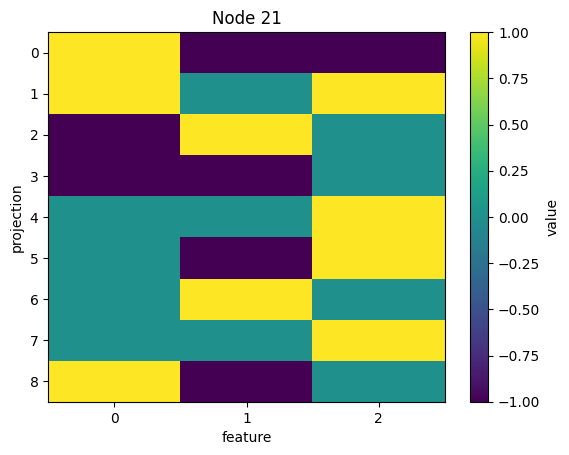

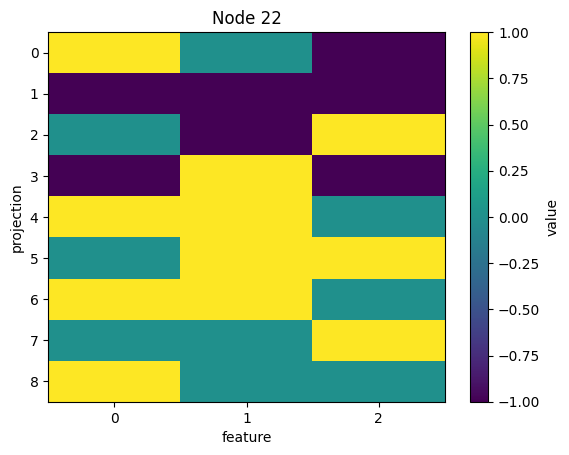

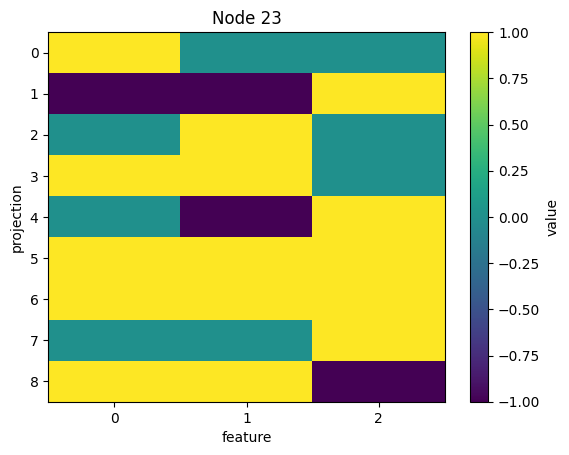

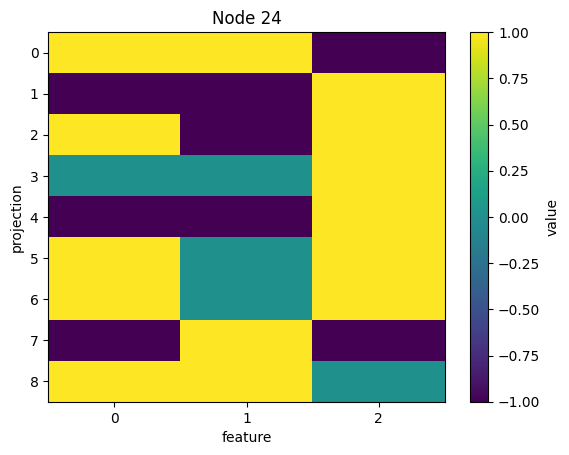

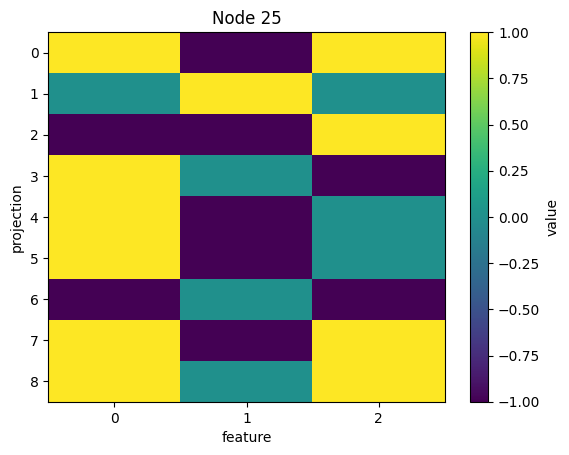

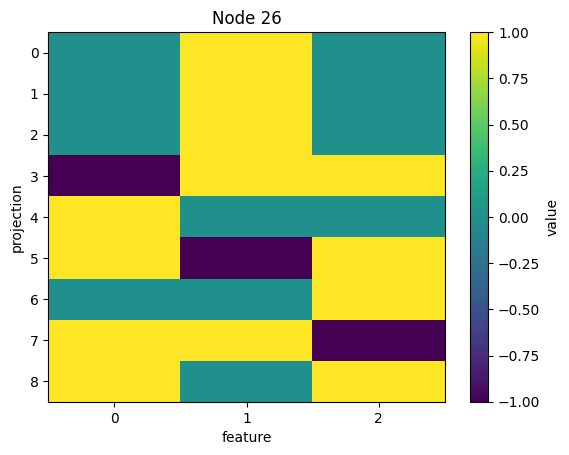

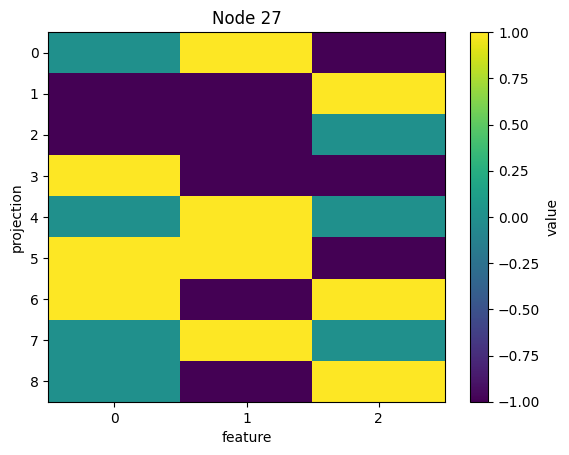

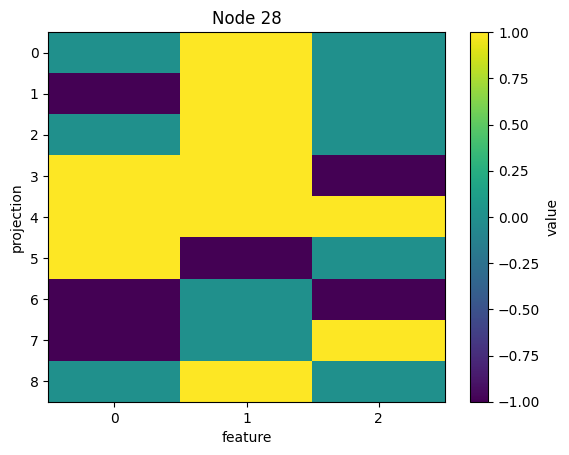

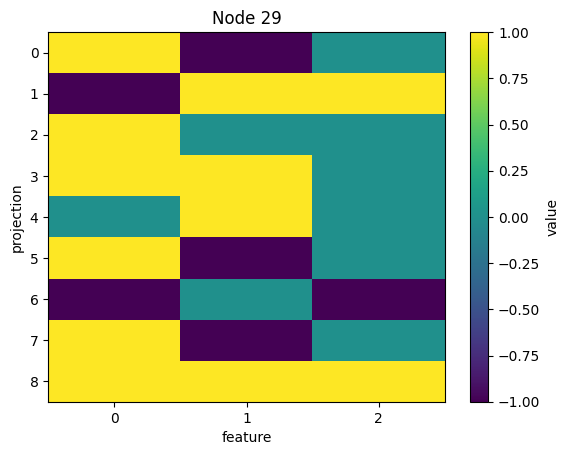

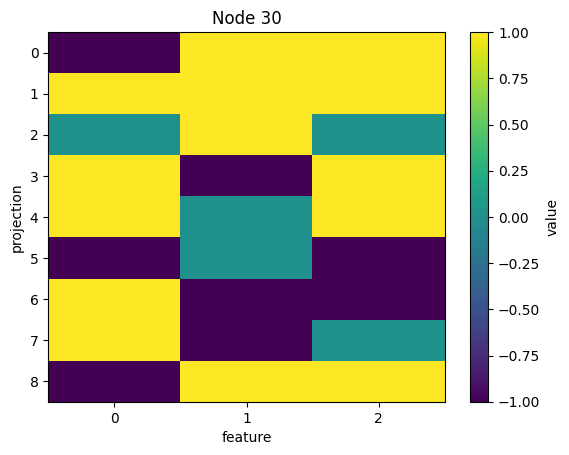

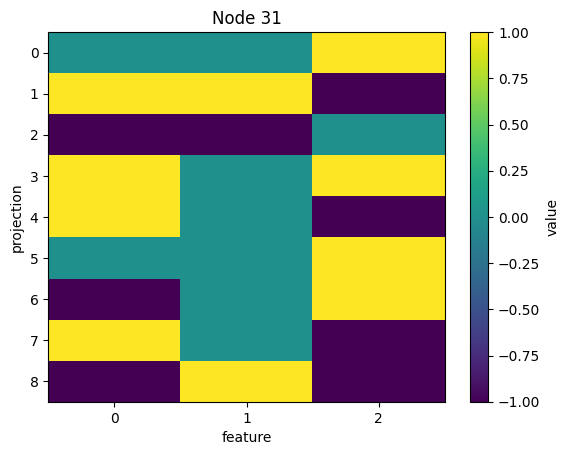

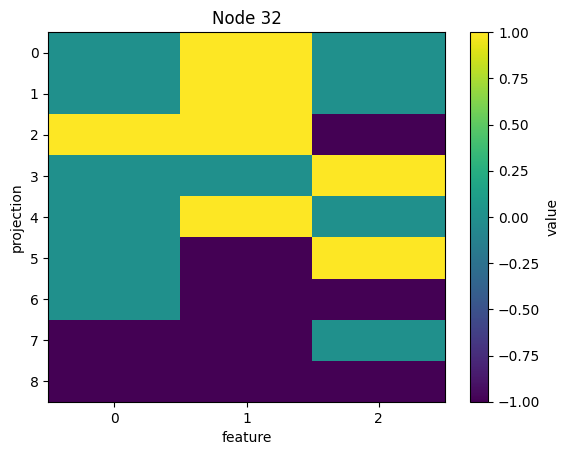

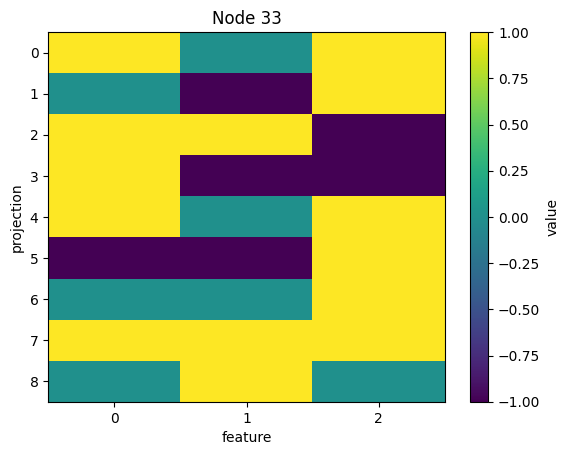

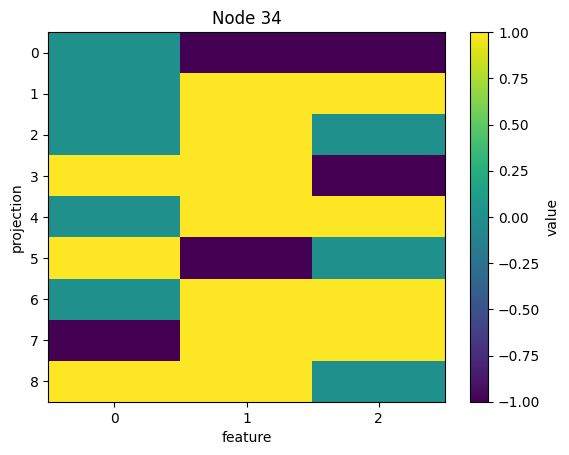

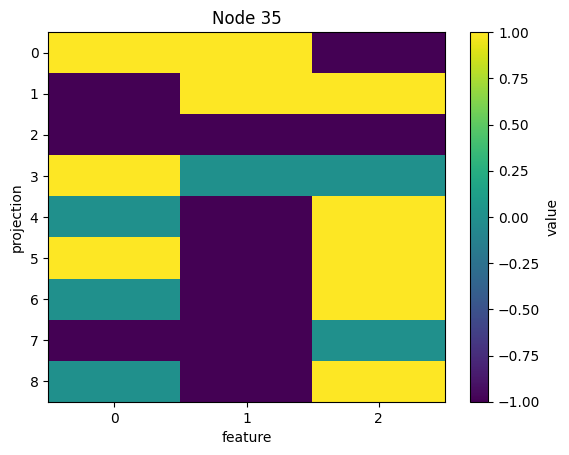

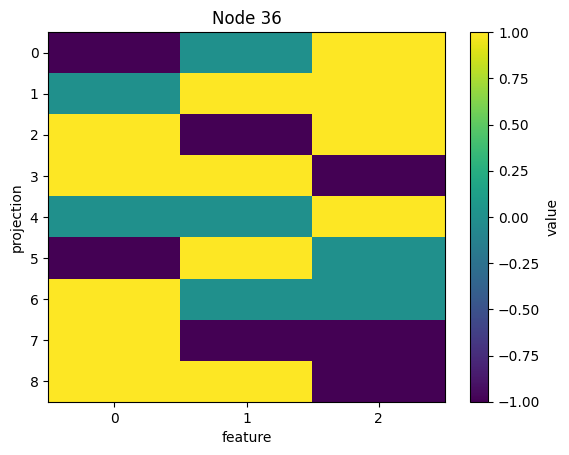

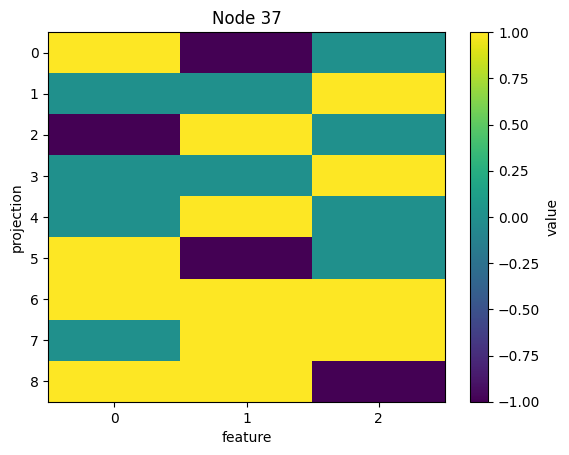

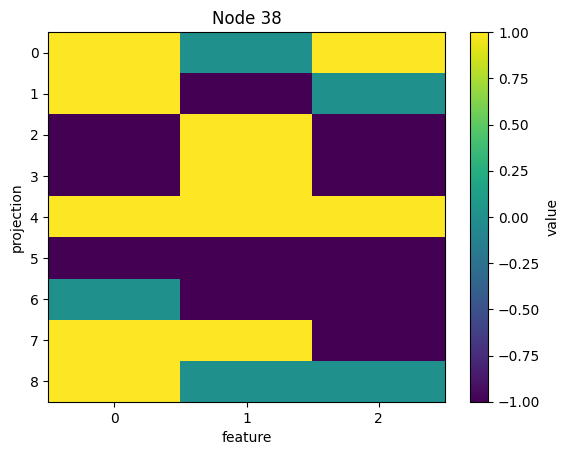

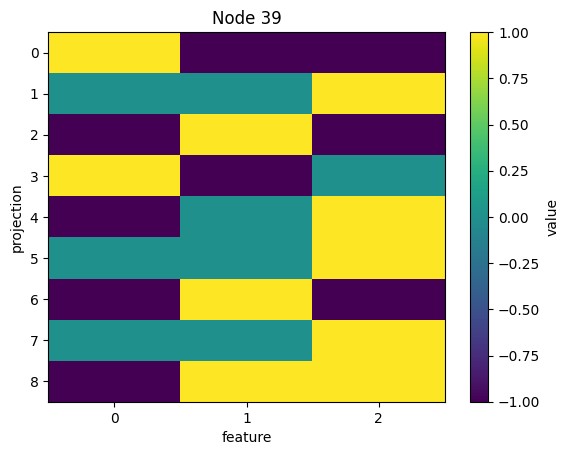

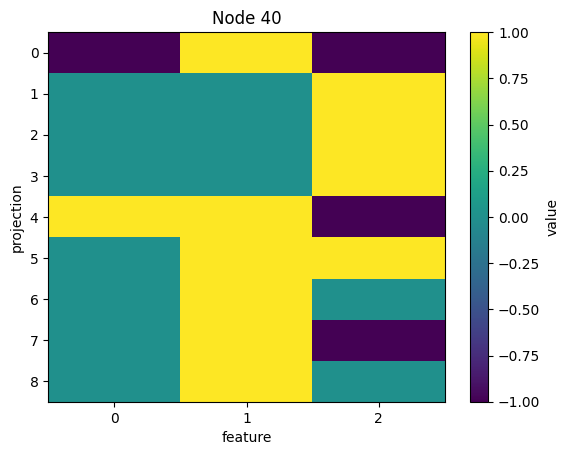

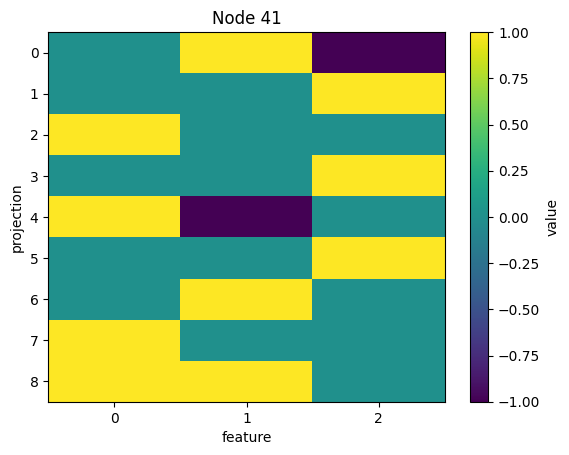

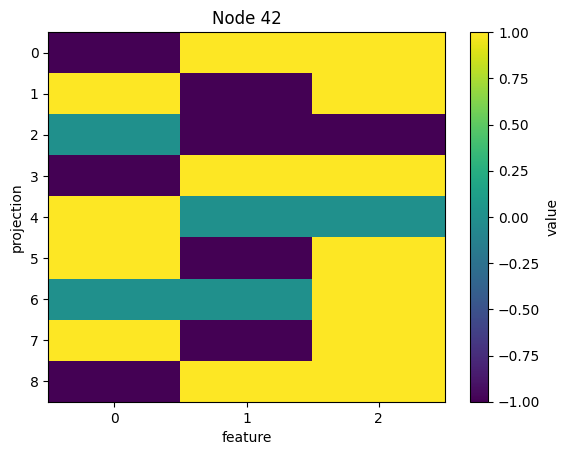

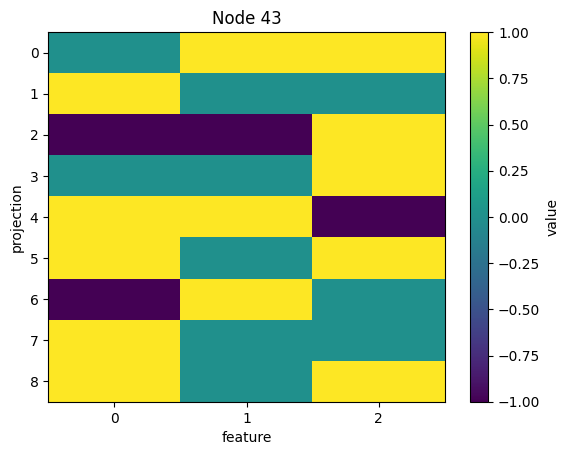

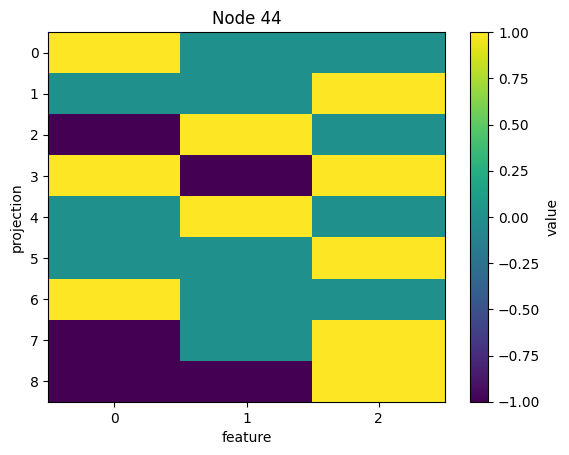

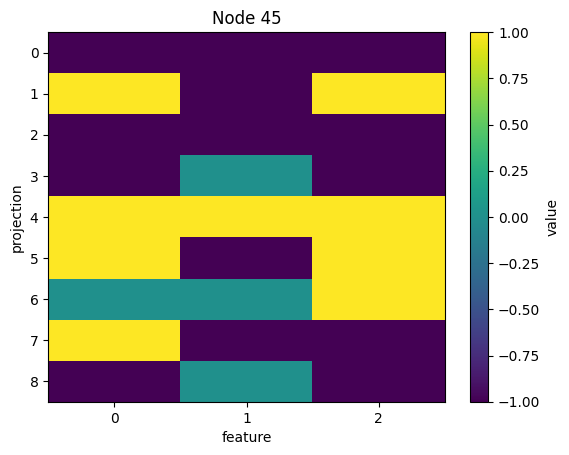

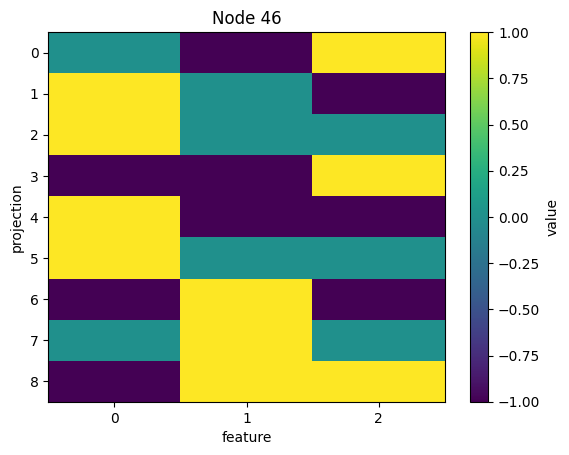

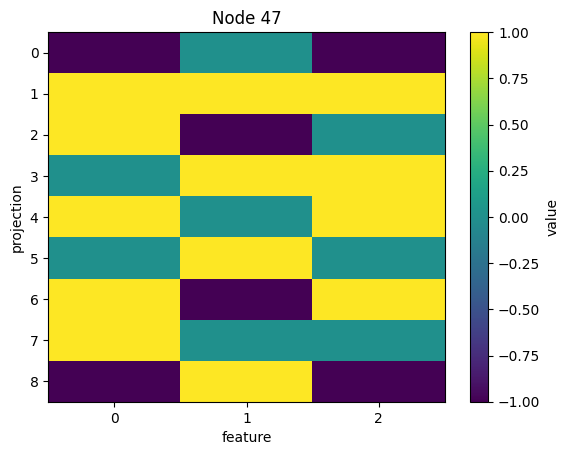

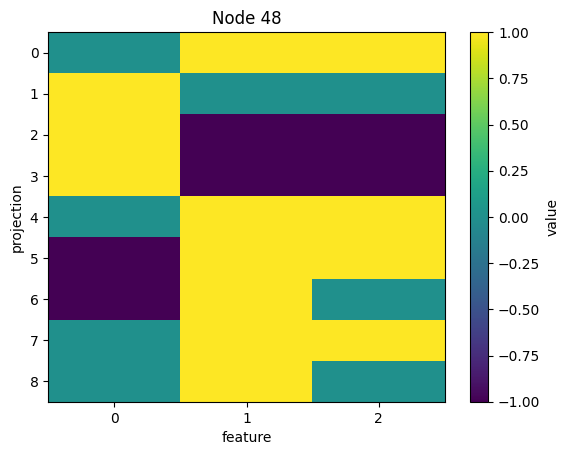

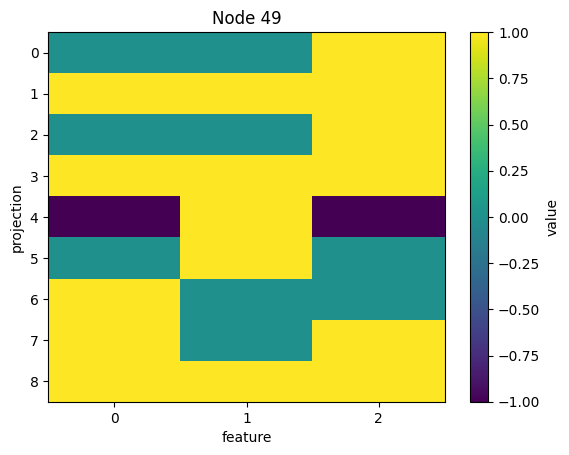

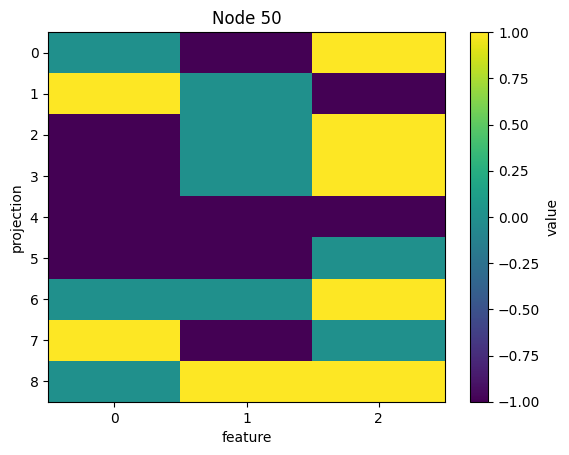

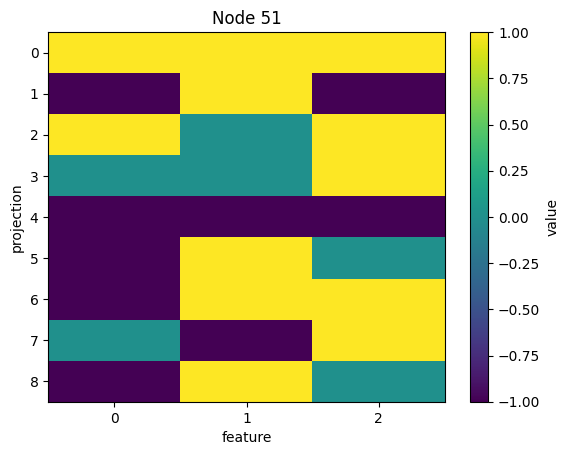

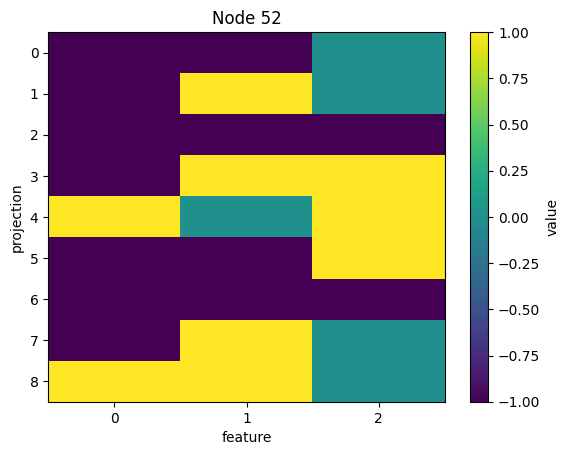

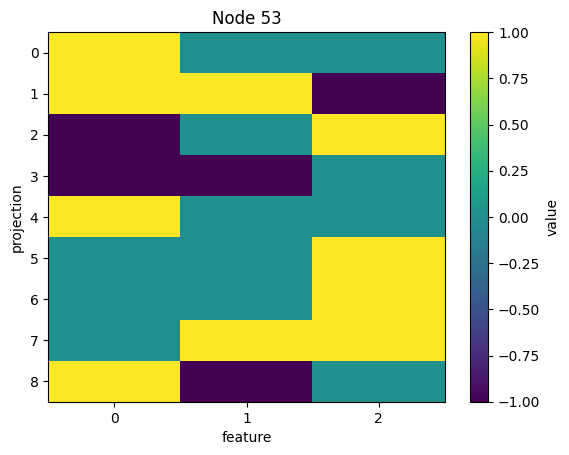

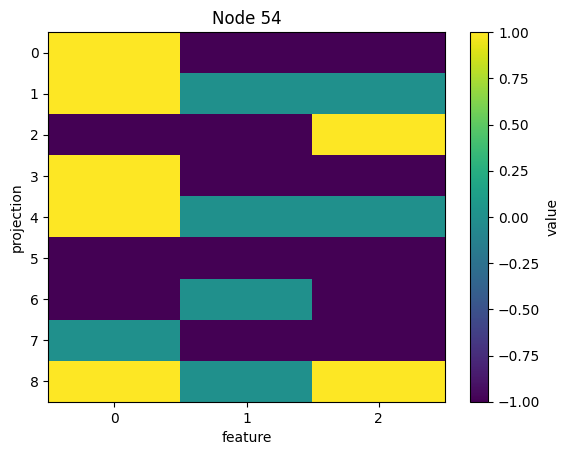

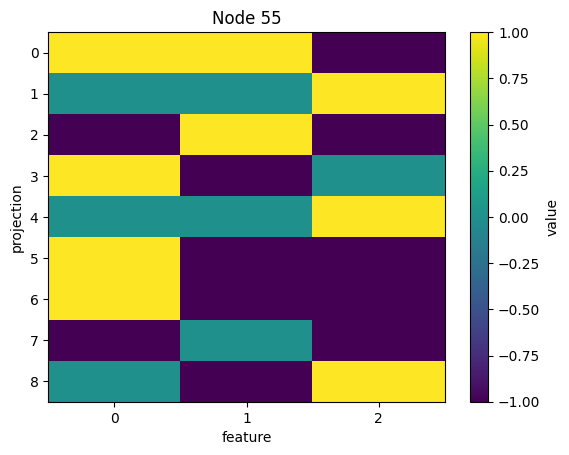

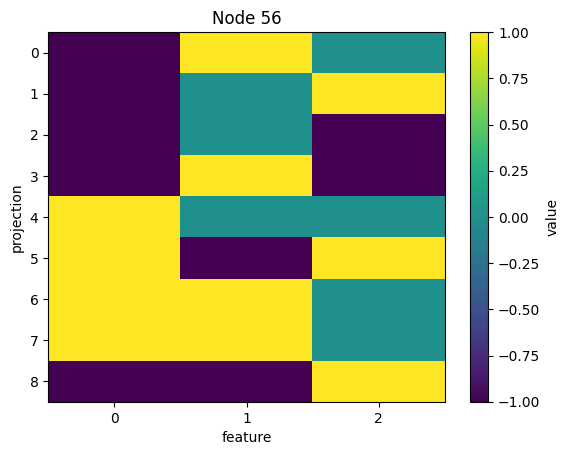

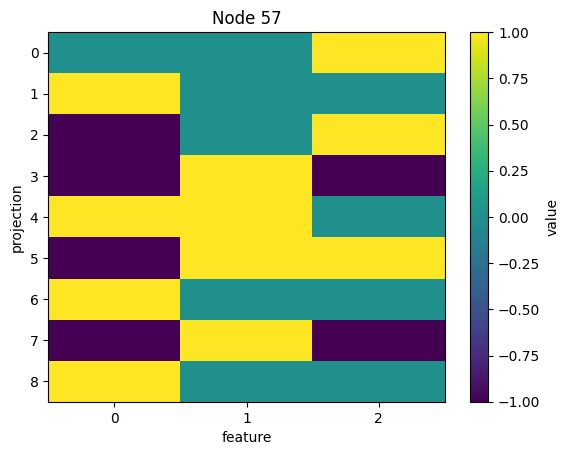

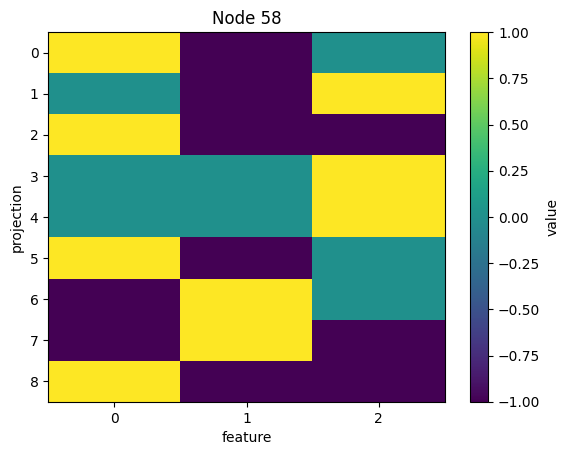

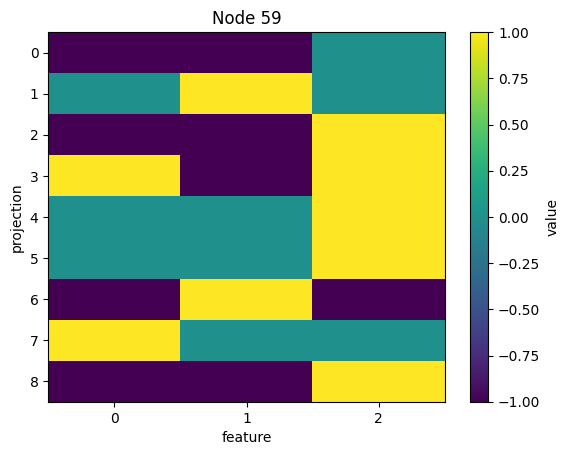

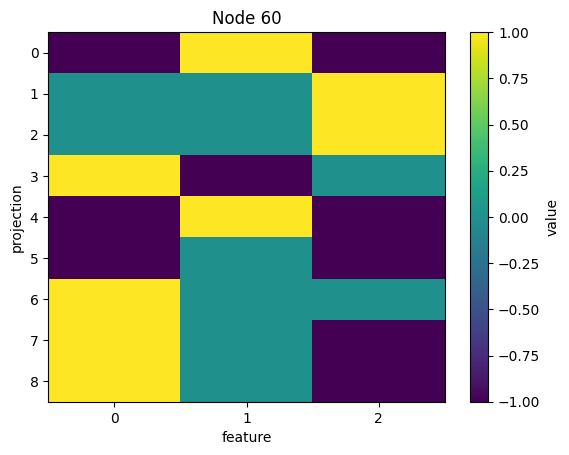

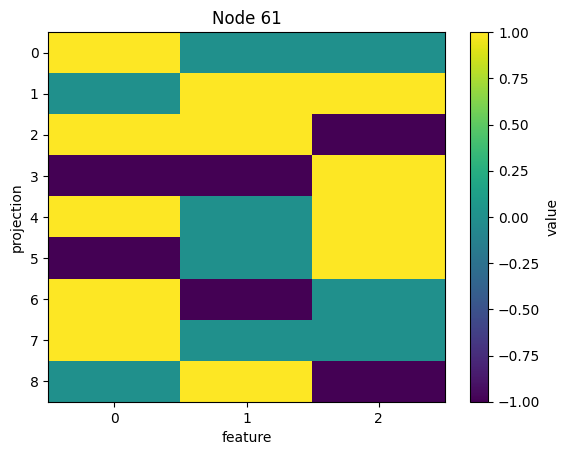

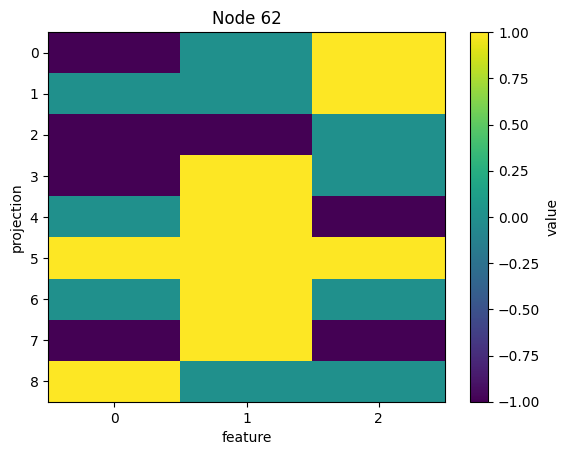

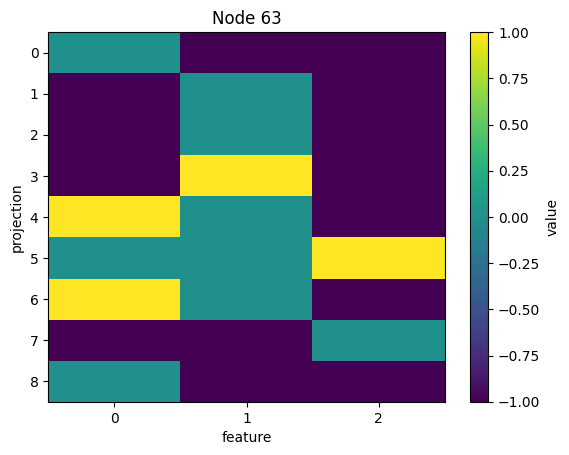

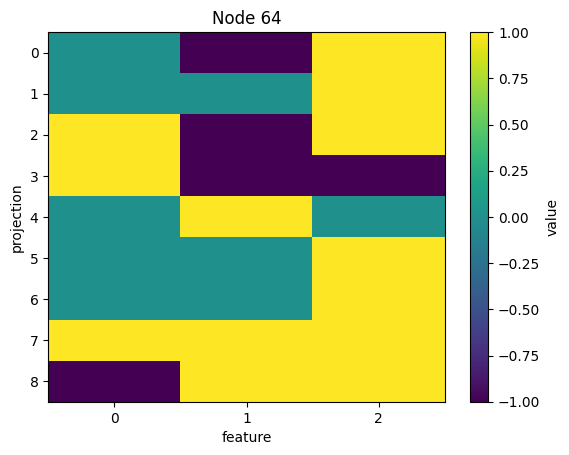

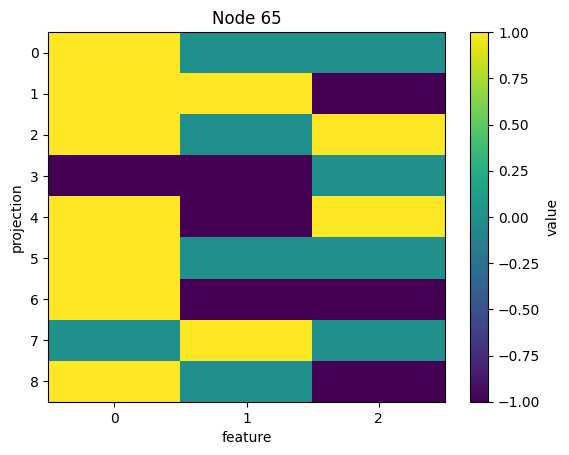

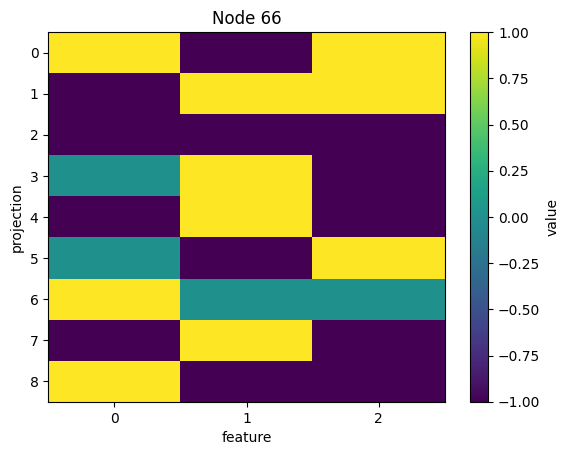

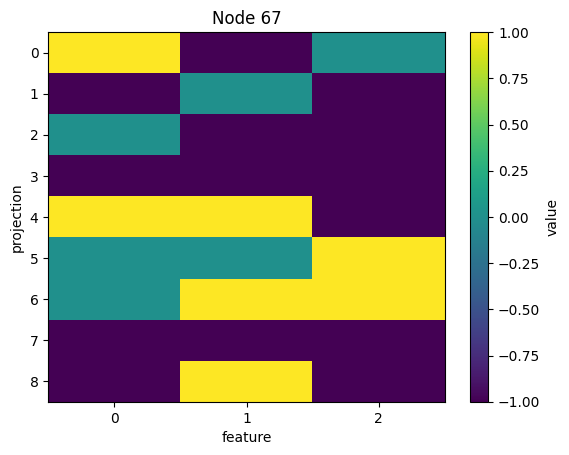

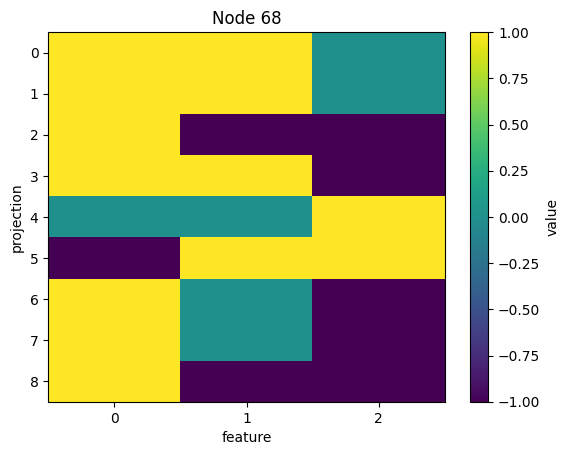

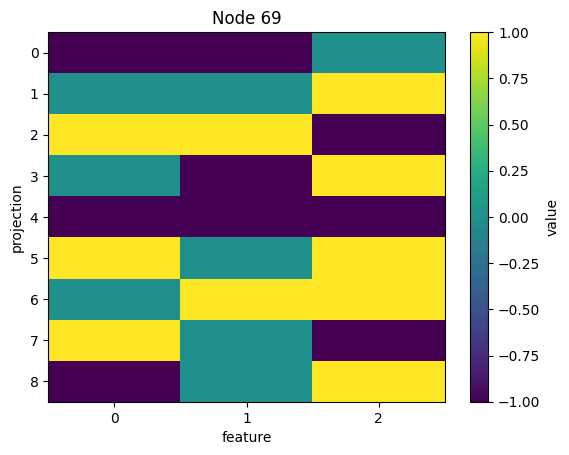

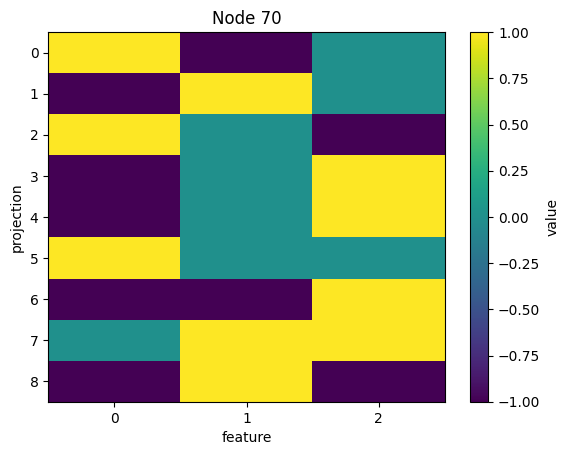

In [17]:
import re
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# CONFIG – either give a path, or set FILE = "" and paste the text
# ------------------------------------------------------------------
FILE = "/Users/ariellubonja/prog/randals_lab/oblique_forest_scaling_experiments/oblique_forest_scaling_experiments/results/ydf_projection_matrices/projection_matrices_haberman.txt"   # <‑‑ path to your dump
RAW_TEXT = ""                  # leave blank to read from FILE

# ------------------------------------------------------------------
# 1.  Load the text
# ------------------------------------------------------------------
if RAW_TEXT:
    text = RAW_TEXT
else:
    text = Path(FILE).read_text()

# ------------------------------------------------------------------
# 2.  Parse every 9×3 projection matrix from each “Node X” block
# ------------------------------------------------------------------
def parse_matrices(text: str):
    """
    Returns {node_id: np.ndarray shape (9,3)} for every node found.
    Assumes each block starts with ‘Node N | …’ and contains exactly
    nine lines that start with ‘proj’.
    """
    matrices = {}
    pattern = re.compile(r"Node (\d+).*?(?=Node \d+|$)", re.S)
    for block in pattern.finditer(text):
        node_id = int(block.group(1))
        rows = []
        for line in block.group(0).splitlines():
            line = line.strip()
            if line.startswith("proj"):
                # tokens: proj, idx, col0, col1, col2
                tokens = line.split()
                rows.append(list(map(int, tokens[2:5])))
        if len(rows) == 9:
            matrices[node_id] = np.asarray(rows, dtype=int)
    return matrices

matrices = parse_matrices(text)

print(f"Parsed {len(matrices)} matrices:", list(matrices.keys()))

# ------------------------------------------------------------------
# 3.  Plot each 9×3 matrix as its own heat‑map figure
# ------------------------------------------------------------------
for node, mat in matrices.items():
    plt.figure()
    plt.imshow(mat, aspect="auto")
    plt.title(f"Node {node}")
    plt.colorbar(label="value")
    plt.xlabel("feature")
    plt.ylabel("projection")
    plt.xticks(range(mat.shape[1]))
    plt.yticks(range(mat.shape[0]))
plt.show()

# matrices is now a dict you can use later:
# e.g.  matrices[0]  -> numpy array for Node 0